In [1]:
import gzip
import os
import pickle
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({"pdf.fonttype": 42, 'text.usetex': True})

# ResNet20 on CIFAR10

In [6]:
bs_list = [64, 128, 256, 512, 1024]
color_dict = {64: 'blue', 128: 'green', 256: 'orange', 512: 'red', 1024: 'purple'}

In [7]:
dict_varpro = {}
dict_varprom = {}
dict_sgd = {}
dict_sgdm = {}
dict_shampoo = {}

dir_path = ('./VarPro_resnet/results')

for bs in tqdm(bs_list):
    with gzip.open(os.path.join(dir_path, f'VarPro_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_varpro[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'VarProM_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_varprom[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'SGD_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_sgd[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'SGDM_lmbda-3.0_bs{bs}_ts-3.0.pkl.gz'), 'rb') as f:
        dict_sgdm[bs] = pickle.load(f)

    with gzip.open(os.path.join(dir_path, f'Shampoo_lmbda-3.0_bs{bs}_ts-2.0.pkl.gz'), 'rb') as f:
        dict_shampoo[bs] = pickle.load(f)
    


100%|██████████| 5/5 [00:19<00:00,  3.89s/it]


## Comparing different batch sizes

## Training loss

<>:26: SyntaxWarning: invalid escape sequence '\#'
<>:29: SyntaxWarning: invalid escape sequence '\#'
<>:34: SyntaxWarning: invalid escape sequence '\#'
<>:26: SyntaxWarning: invalid escape sequence '\#'
<>:29: SyntaxWarning: invalid escape sequence '\#'
<>:34: SyntaxWarning: invalid escape sequence '\#'
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_4067/1672412621.py:26: SyntaxWarning: invalid escape sequence '\#'
  ax[0].set_xlabel('$\#$ pass on the dataset')
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_4067/1672412621.py:29: SyntaxWarning: invalid escape sequence '\#'
  ax[1].set_xlabel('$\#$ pass on the dataset')
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_4067/1672412621.py:34: SyntaxWarning: invalid escape sequence '\#'
  ax[2].set_xlabel('$\#$ pass on the dataset')
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_4067/1672412621.py:37: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust 

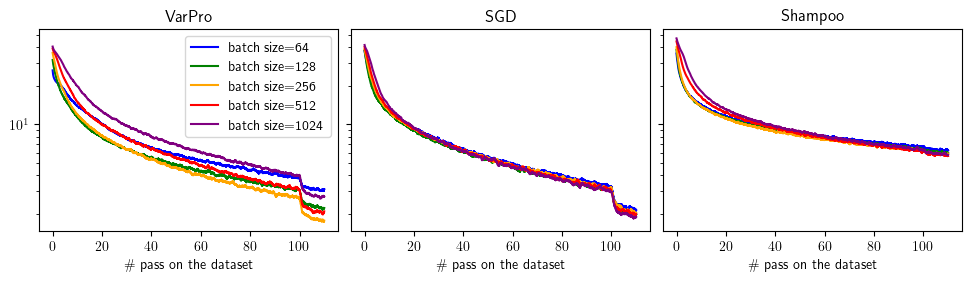

In [ ]:
p=0.3
fig, ax = plt.subplots(1, 3, figsize=(32 * p, 9 * p), constrained_layout=True, sharey=True)

for bs in bs_list:
    loss_list = dict_varprom[bs]['loss_list']
    window =  np.lib.stride_tricks.sliding_window_view(loss_list, int(len(loss_list)/110))
    mean = np.mean(window, axis=-1)
    time = np.linspace(0, 110, len(mean))
    ax[0].plot(time, mean, label=f'batch size={bs}', color=color_dict[bs])

    loss_list = dict_sgdm[bs]['loss_list']
    window =  np.lib.stride_tricks.sliding_window_view(loss_list, int(len(loss_list)/110))
    mean = np.mean(window, axis=-1)
    time = np.linspace(0, 110, len(mean))
    ax[1].plot(time, mean, color=color_dict[bs])

    loss_list = dict_shampoo[bs]['loss_list']
    window =  np.lib.stride_tricks.sliding_window_view(loss_list, int(len(loss_list)/110))
    mean = np.mean(window, axis=-1)
    time = np.linspace(0, 110, len(mean))
    ax[2].plot(time, mean, color=color_dict[bs])


ax[0].legend()
ax[0].set_yscale('log')
ax[0].set_xlabel('$\#$ pass on the dataset')
ax[0].set_title('VarPro')

ax[1].set_xlabel('$\#$ pass on the dataset')
ax[1].set_title('SGD')
#ax[1].yaxis.tick_right()
#ax[1].yaxis.set_label_position("right")

ax[2].set_xlabel('$\#$ pass on the dataset')
ax[2].set_title('Shampoo')

fig.subplots_adjust(hspace=0)

#fig.savefig('resnet_risk.pdf', format='pdf', bbox_inches='tight')

#plt.title('Evolution of the reduced risk during training')


## Accuracy

<>:18: SyntaxWarning: invalid escape sequence '\#'
<>:21: SyntaxWarning: invalid escape sequence '\#'
<>:26: SyntaxWarning: invalid escape sequence '\#'
<>:18: SyntaxWarning: invalid escape sequence '\#'
<>:21: SyntaxWarning: invalid escape sequence '\#'
<>:26: SyntaxWarning: invalid escape sequence '\#'
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_4067/1114759727.py:18: SyntaxWarning: invalid escape sequence '\#'
  ax[0].set_xlabel('$\#$ pass on the dataset')
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_4067/1114759727.py:21: SyntaxWarning: invalid escape sequence '\#'
  ax[1].set_xlabel('$\#$ pass on the dataset')
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_4067/1114759727.py:26: SyntaxWarning: invalid escape sequence '\#'
  ax[2].set_xlabel('$\#$ pass on the dataset')
/var/folders/b5/pzc2mp2927v5m5s76m6ytq2w0000gp/T/ipykernel_4067/1114759727.py:29: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust 

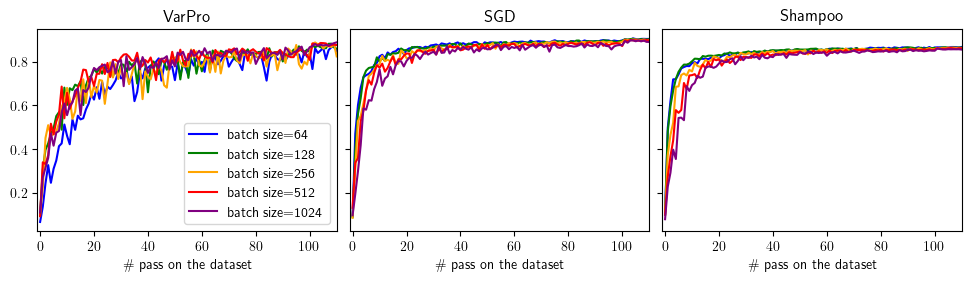

In [ ]:
p=0.3
fig, ax = plt.subplots(1, 3, figsize=(32 * p, 9 * p), constrained_layout=True, sharey=True, sharex=True)

for bs in bs_list:
    accuracy_list = dict_varprom[bs]['accuracy_list']
    ax[0].plot(accuracy_list, label=f'batch size={bs}', color=color_dict[bs])

    accuracy_list = dict_sgdm[bs]['accuracy_list']
    ax[1].plot(accuracy_list, color=color_dict[bs])

    accuracy_list = dict_shampoo[bs]['accuracy_list']
    ax[2].plot(accuracy_list, color=color_dict[bs])


ax[0].legend()
#ax[0].set_yscale('log')
ax[0].set_xlim((-1,110))
ax[0].set_xlabel('$\#$ pass on the dataset')
ax[0].set_title('VarPro')

ax[1].set_xlabel('$\#$ pass on the dataset')
ax[1].set_title('SGD')
#ax[1].yaxis.tick_right()
#ax[1].yaxis.set_label_position("right")

ax[2].set_xlabel('$\#$ pass on the dataset')
ax[2].set_title('Shampoo')

fig.subplots_adjust(hspace=0)

#fig.savefig('resnet_accuracy.pdf', format='pdf', bbox_inches='tight')

#plt.title('Evolution of the reduced risk during training')

## Comparing different methods

Text(0.5, 1.0, 'Accuracy')

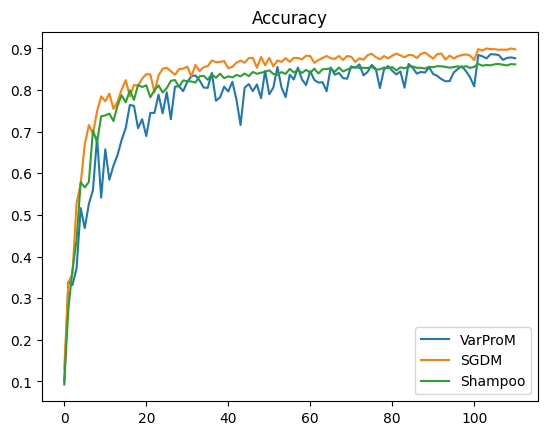

In [27]:
bs = 512

plt.plot(dict_varprom[bs]['accuracy_list'], label=f'VarProM')
#plt.plot(dict_2ts[bs]['accuracy_list'], label=f'batch size={bs}', color=color_dict[bs])
plt.plot(dict_sgdm[bs]['accuracy_list'], label=f'SGDM')
plt.plot(dict_shampoo[bs]['accuracy_list'], label=f'Shampoo')
plt.legend()
plt.title('Accuracy')
#plt.yscale('log')